In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Reading the dataset in CSV format
df = pd.read_csv('LifeExpectancyData.csv')

In [3]:
df.head()

,Country,Year,lifespan,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population
0,Afghanistan,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,33736494.0
1,Afghanistan,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,327582.0
2,Afghanistan,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,31731688.0
3,Afghanistan,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,3696958.0
4,Afghanistan,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,2978599.0


In [4]:
print(df.dtypes)

Country                    object
Year                        int64
lifespan                  float64
Adult Mortality           float64
infant deaths             float64
Alcohol                   float64
percentage expenditure    float64
Hepatitis B               float64
Measles                   float64
 BMI                      float64
under-five deaths         float64
Polio                     float64
Total expenditure         float64
Diphtheria                float64
 HIV/AIDS                 float64
Population                float64
dtype: object


In [5]:
print(df.columns)
#1. Country & Year: These columns likely represent the geographical and temporal dimensions of the data, respectively.
#2. Lifespan: This column represent the average lifespan in years for each country.
#3. Adult Mortality: This indicate the probability of dying between the ages of 15 and 60.
#4. Infant Deaths & Under-Five Deaths: These columns may represent the number of infant deaths and deaths of children under the age of five, respectively.
#5. Alcohol: Possibly the average alcohol consumption per capita.
#6. Percentage Expenditure: Expenditure on healthcare as a percentage of GDP.
#7. Hepatitis B, Measles, Polio, Diphtheria: Immunization coverage rates for these diseases.
#8. BMI: Average Body Mass Index.
#9. Total Expenditure: Government healthcare expenditure as a percentage of GDP.
#10. HIV/AIDS: Prevalence rate of HIV/AIDS.
#11. Population: Total population of each country.

Index(['Country', 'Year', 'lifespan', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'Population'],
      dtype='object')


In [6]:
print("Dataset Summary Statistics:")
print(df.describe())

Dataset Summary Statistics:
              Year     lifespan  Adult Mortality  infant deaths      Alcohol  \
count  2938.000000  2923.000000      2922.000000    2934.000000  2740.000000   
mean   2007.518720    69.217414       164.898700      30.252556     4.605168   
std       4.613841     9.529489       124.335098     117.982434     4.054088   
min    2000.000000    36.300000         1.000000       0.000000     0.010000   
25%    2004.000000    63.100000        74.000000       0.000000     0.877500   
50%    2008.000000    72.100000       144.000000       3.000000     3.760000   
75%    2012.000000    75.650000       228.000000      22.000000     7.712500   
max    2015.000000    89.000000       723.000000    1800.000000    17.870000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             2933.000000  2381.000000    2937.000000  2901.000000   
mean               738.174709    80.929021    2420.356146    38.302689   
std               1989.373322

In [7]:
#Countries with higher adult mortality rates likely to have lower percentages of hepatitis B vaccination coverage.
#There is a positive correlation between the percentage of the population vaccinated against diseases like measles, polio, and diphtheria and the average lifespan.
#Higher healthcare expenditure as a percentage of GDP correlates positively with indicators such as average lifespan and immunization coverage.
#There is a negative correlation between the of HIV/AIDS and average lifespan.
#Countries with higher alcohol consumption per capita may to have higher rates of adult mortality and lower average lifespans.
#Higher BMI values are associated with higher rates of adult mortality and infant deaths 
# Population size  is positively correlated with healthcare expenditure


C:\Users\prave\AppData\Local\Temp\ipykernel_4872\2731807244.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='lifespan', data=df, ci=None)


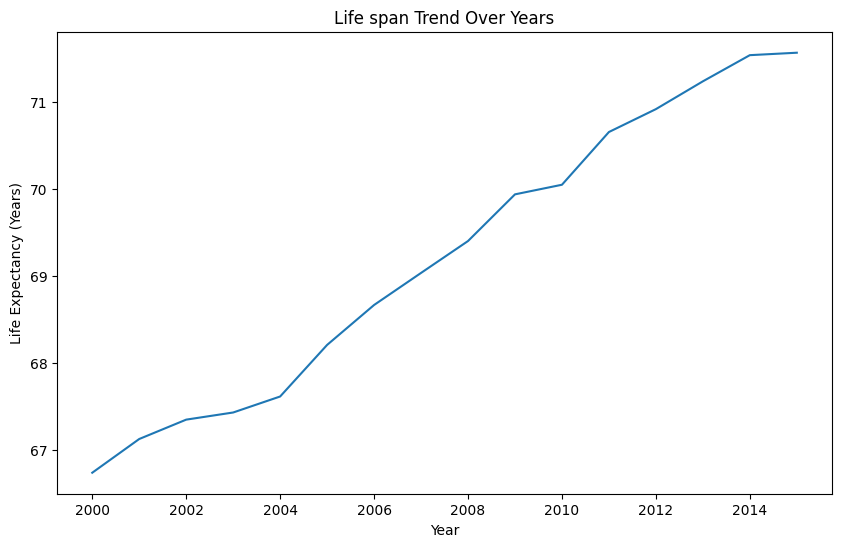

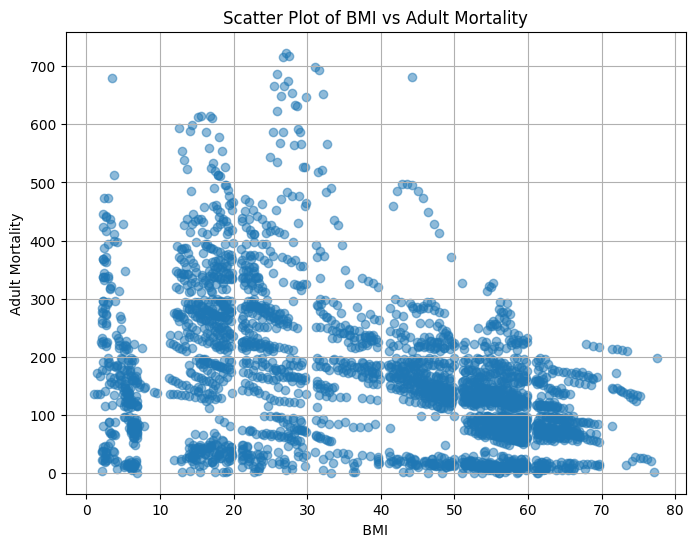

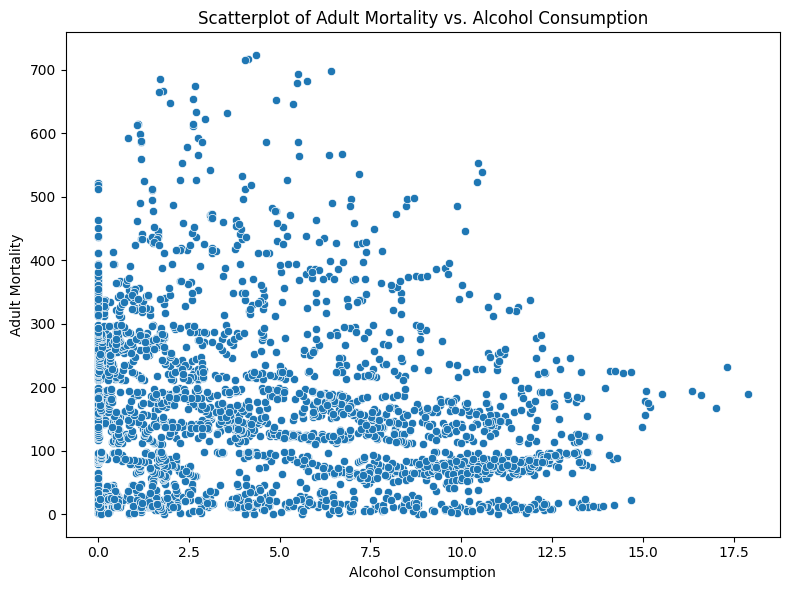

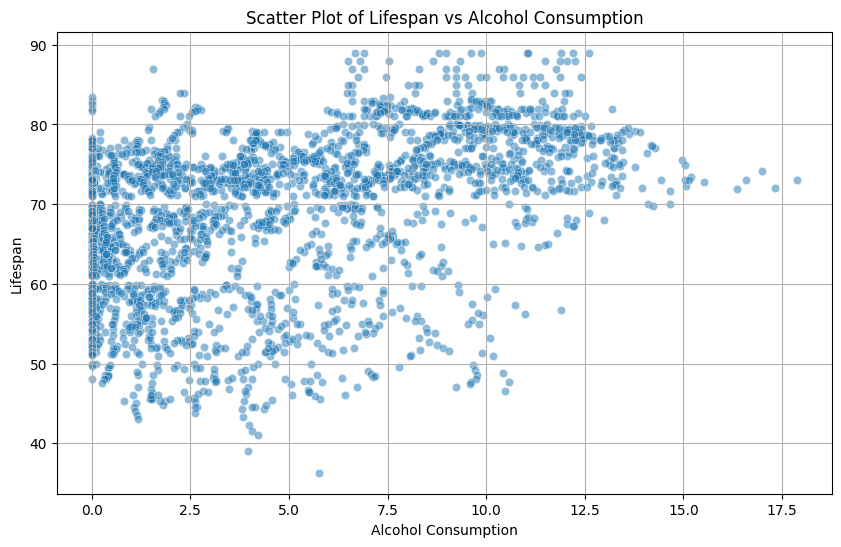

In [8]:

import seaborn as sns

#  Life Expectancy Trend Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='lifespan', data=df, ci=None)
plt.title('Life span Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')

#Scatter Plot of BMI vs Adult Mortality
plt.figure(figsize=(8, 6))
plt.scatter(df[' BMI '], df['Adult Mortality'], alpha=0.5)
plt.title('Scatter Plot of BMI vs Adult Mortality')
plt.xlabel(' BMI ')
plt.ylabel('Adult Mortality')
plt.grid(True)
plt.show()

#  Scatterplot of Adult Mortality vs. Alcohol Consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Alcohol', y='Adult Mortality', data=df)
plt.title('Scatterplot of Adult Mortality vs. Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Adult Mortality')

plt.tight_layout()
plt.show()


#Scatter Plot of Lifespan vs Alcohol Consumption

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Alcohol', y='lifespan', data=df, alpha=0.5)
plt.title('Scatter Plot of Lifespan vs Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Lifespan')
plt.grid(True)
plt.show()



In [9]:
y = df.lifespan
df = df.drop('lifespan', axis=1) # dropping from the features set
df.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population
0,Afghanistan,2015,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,33736494.0
1,Afghanistan,2014,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,327582.0
2,Afghanistan,2013,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,31731688.0
3,Afghanistan,2012,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,3696958.0
4,Afghanistan,2011,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,2978599.0


In [10]:
#divided integer values to df_num and object to df_cat
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include='object')

In [11]:
missing_nume_count_per_column = df_num.isnull().sum()
print(missing_nume_count_per_column)
missing_cat_count_per_column = df_cat.isnull().sum()
print(missing_cat_count_per_column)
missing_y_count_per_column = y.isnull().sum()
print(missing_y_count_per_column)


Year                        0
Adult Mortality            16
infant deaths               4
Alcohol                   198
percentage expenditure      5
Hepatitis B               557
Measles                     1
 BMI                       37
under-five deaths           4
Polio                      25
Total expenditure         233
Diphtheria                 23
 HIV/AIDS                   1
Population                652
dtype: int64
Country    37
dtype: int64
15


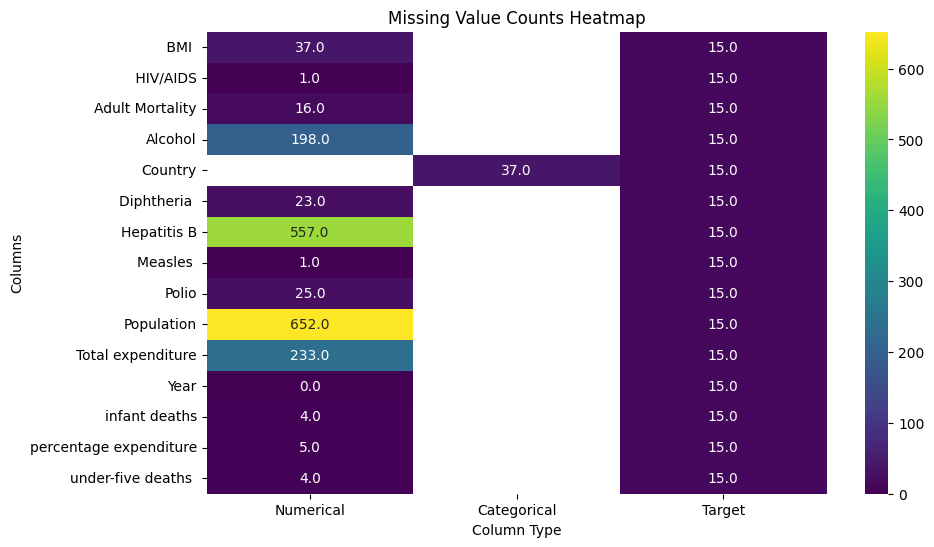

In [12]:


# Assuming missing_nume_count_per_column, missing_cat_count_per_column, and missing_y_count_per_column are Series containing missing value counts
# Replace them with your actual missing value count Series

missing_counts_df = pd.DataFrame({
    'Numerical': missing_nume_count_per_column,
    'Categorical': missing_cat_count_per_column
})

target_numeric = pd.to_numeric(missing_y_count_per_column, errors='coerce')

missing_counts_df['Target'] = target_numeric

# Create a heatmap of missing value counts
plt.figure(figsize=(10, 6))
sns.heatmap(missing_counts_df, cmap='viridis', cbar=True, annot=True, fmt='.1f')
plt.title('Missing Value Counts Heatmap')
plt.xlabel('Column Type')
plt.ylabel('Columns')
plt.show()


In [13]:
#filling df_num with mean
#filling y label with mean
#filling df_cat with mode
df_filled_with_mean = df_num.fillna(df_num.mean())
df_num=df_filled_with_mean
y = y.fillna(y.mean())
df = pd.DataFrame(df_cat)

def replace_missing_categorical_with_modes(column):
   
    non_null_values = column.dropna()
    
  
    modes = non_null_values.mode()
    

    column = column.fillna(', '.join(modes))
    
    return column

# Apply the function to each column
df_filled_with_modes = df.apply(replace_missing_categorical_with_modes)
df_cat = df_filled_with_modes



In [14]:
missing_nume_count_per_column = df_num.isnull().sum()
print(missing_nume_count_per_column)
missing_cat_count_per_column = df_cat.isnull().sum()
print(missing_cat_count_per_column)
missing_y_count_per_column = y.isnull().sum()
print(missing_y_count_per_column)


Year                      0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
 BMI                      0
under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
 HIV/AIDS                 0
Population                0
dtype: int64
Country    0
dtype: int64
0


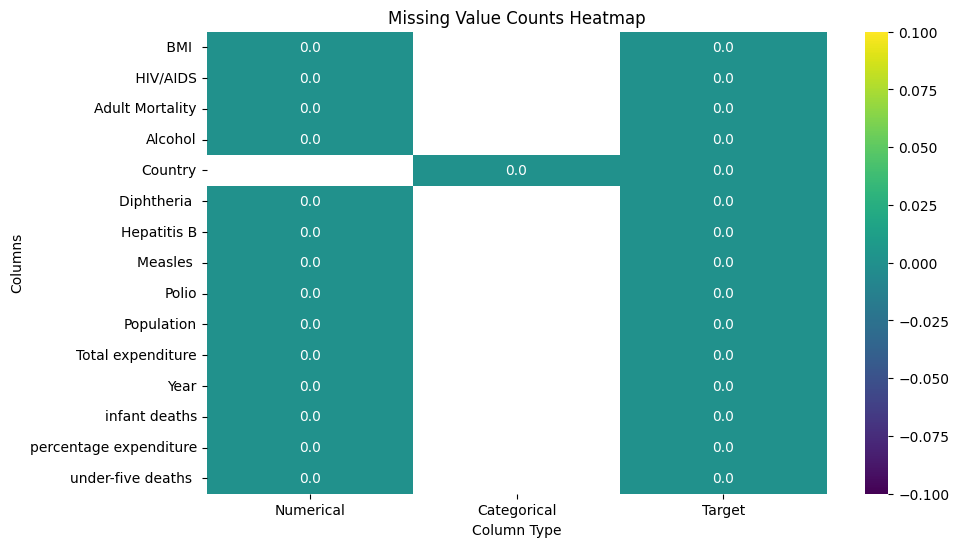

In [15]:

#checking missing values again
missing_counts_df = pd.DataFrame({
    'Numerical': missing_nume_count_per_column,
    'Categorical': missing_cat_count_per_column
})


target_numeric = pd.to_numeric(missing_y_count_per_column, errors='coerce')


missing_counts_df['Target'] = target_numeric

# Create a heatmap of missing value counts
plt.figure(figsize=(10, 6))
sns.heatmap(missing_counts_df, cmap='viridis', cbar=True, annot=True, fmt='.1f')
plt.title('Missing Value Counts Heatmap')
plt.xlabel('Column Type')
plt.ylabel('Columns')
plt.show()


In [16]:



df = pd.DataFrame(df_num)

def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    
    return outliers

outliers_df = df.apply(detect_outliers)

print("Outliers Detected:")
print(outliers_df)


Outliers Detected:
       Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     False            False           True    False                   False   
1     False            False           True    False                   False   
2     False            False           True    False                   False   
3     False            False           True    False                   False   
4     False            False           True    False                   False   
...     ...              ...            ...      ...                     ...   
2933  False             True          False    False                   False   
2934  False             True          False    False                   False   
2935  False            False          False    False                   False   
2936  False             True          False    False                   False   
2937  False             True          False    False                   False   

      Hepatitis B  M

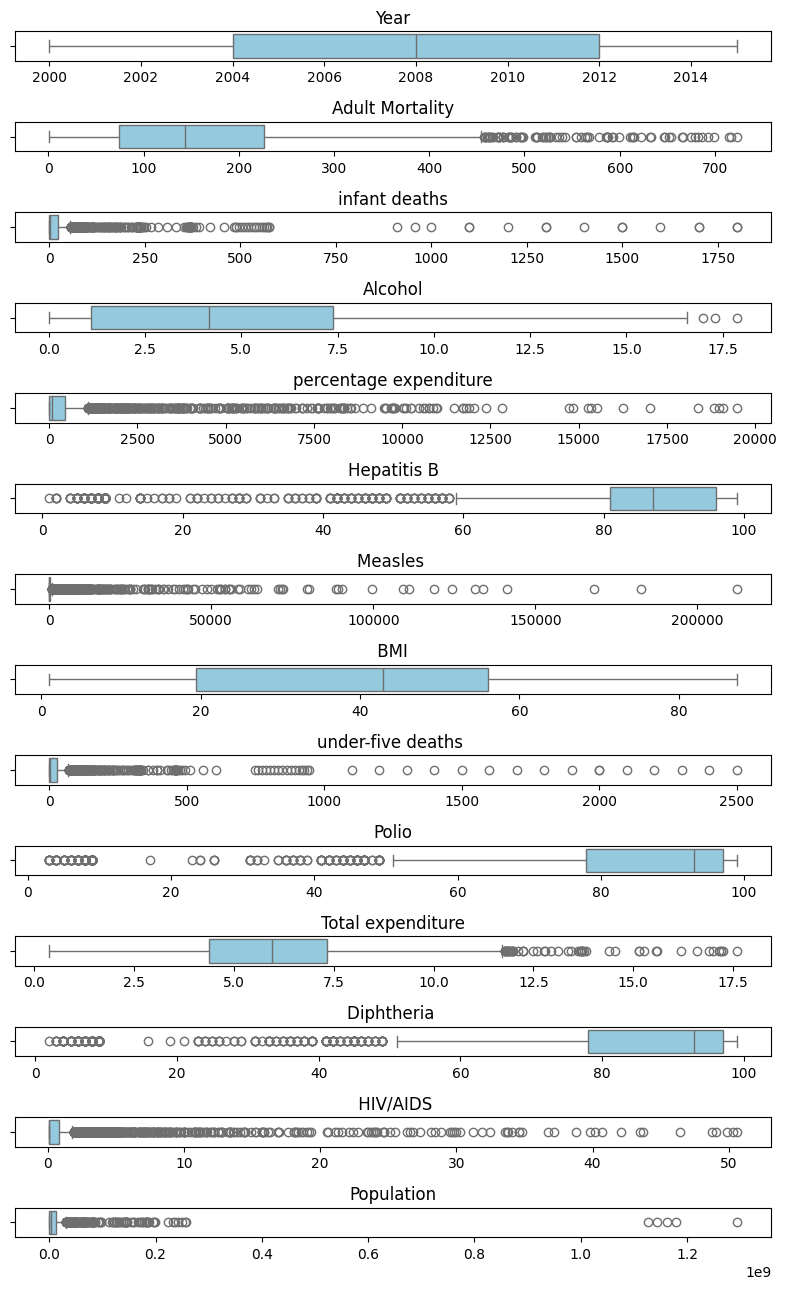

In [17]:


#finding outliers

numerical_columns = df.select_dtypes(include=['number']).columns

#Box Plot outliears
plt.figure(figsize=(8, 13))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[col], orient='h', color='skyblue')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [18]:
# Replacing outliers with mean
for i in range(2):
    
    df = pd.DataFrame(df_num)


    def replace_outliers_with_mean(column):
   
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
    
    
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with mean
        column[column < lower_bound] = column.mean()
        column[column > upper_bound] = column.mean()
        
    
        return column


    df_no_outliers_mean = df.apply(replace_outliers_with_mean)

df_num=df_no_outliers_mean


In [19]:

#checking once again for outliears

df = pd.DataFrame(df_num)


def detect_outliers(column):

    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    
   
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    

    outliers = (column < lower_bound) | (column > upper_bound)
    
    return outliers


outliers_df = df.apply(detect_outliers)

print("Outliers Detected:")
print(outliers_df)

Outliers Detected:
       Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     False            False          False    False                   False   
1     False            False          False    False                   False   
2     False            False          False    False                   False   
3     False            False          False    False                   False   
4     False            False          False    False                   False   
...     ...              ...            ...      ...                     ...   
2933  False            False          False    False                   False   
2934  False            False          False    False                   False   
2935  False            False          False    False                   False   
2936  False            False          False    False                   False   
2937  False            False          False    False                   False   

      Hepatitis B  M

In [20]:
# Describe the dataset
print("Dataset Summary Statistics:")
print(df.describe())

Dataset Summary Statistics:
              Year  Adult Mortality  infant deaths      Alcohol  \
count  2938.000000      2938.000000    2938.000000  2938.000000   
mean   2007.518720       151.420240      10.991171     4.592113   
std       4.613841       100.357944      14.296632     3.893629   
min    2000.000000         1.000000       0.000000     0.010000   
25%    2004.000000        74.000000       0.000000     1.100000   
50%    2008.000000       144.000000       3.000000     4.160000   
75%    2012.000000       215.000000      22.000000     7.380000   
max    2015.000000       434.000000      55.000000    16.580000   

       percentage expenditure  Hepatitis B     Measles          BMI   \
count             2938.000000  2938.000000  2938.000000  2938.000000   
mean               237.109448    87.055152   162.696918    38.302689   
std                299.396623     9.220911   229.197009    19.919282   
min                  0.000000    59.000000     0.000000     1.000000   
25%     

In [21]:
# One-hot encoding of object columns
ohe = OneHotEncoder()
df_cat_encoded = ohe.fit_transform(df_cat).toarray()
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=ohe.get_feature_names_out(df_cat.columns.tolist()))

In [22]:
# Rescale numeric columns
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [23]:
# Merged encoded categorical columns and rescaled numeric columns into one dataset
df_merged = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

In [24]:
df_merged.to_csv('lifefeatures.csv', index=False)
y.to_csv('lifelabel.csv', index=False)

In [25]:
df.shape, df_num.shape, df_cat.shape, df_merged.shape, y.shape

((2938, 14), (2938, 14), (2938, 1), (2938, 208), (2938,))

In [26]:
# Splited dataset into a 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(df_merged, y, test_size=0.3, random_state=42)

In [27]:
print(X_train, X_test, y_train, y_test)

          Year  Adult Mortality  infant deaths   Alcohol  \
1641  0.104330        -0.871233      -0.768925  0.654485   
618  -0.545998         2.417557      -0.209258 -0.658139   
406   0.321106         1.311328       2.309246 -0.010818   
1094  0.754658         1.371124      -0.489091 -0.262554   
1788 -0.112446         0.653570       1.347497 -1.112805   
...        ...              ...            ...       ...   
1638  0.754658        -0.921063      -0.768925  0.595404   
1095  0.537882         1.351192      -0.489091 -0.355028   
1130 -0.112446         1.141905       0.420368  0.382199   
1294 -0.979550        -0.791504      -0.629008  1.209332   
860  -0.545998        -1.170214      -0.279216 -0.904738   

      percentage expenditure  Hepatitis B  Measles       BMI   \
1641                1.673868    -0.114450 -0.705613  1.420841   
618                -0.792092    -0.664487 -0.072862 -0.833640   
406                -0.521024     0.536356  1.536806 -1.114823   
1094               

In [28]:
k = [3,5,9,13,15]

for K in k: 
    print("K:",K)
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_train, y_train)

    # Estimate training MAE (Mean Absolute Error)
    y_train_pred = knn.predict(X_train)
    mape_train = mean_absolute_error(y_train, y_train_pred)
    print("Training MAE: ", np.round(mape_train,3))

        # Estimate test MAPE (Mean Absolute Error)
    y_test_pred = knn.predict(X_test)
    mape_test = mean_absolute_error(y_test, y_test_pred)
    print("Test MAE: ", np.round(mape_test,3))

      
    # Estimate training MAE (Mean Absolute Error)
    y_train_pred = knn.predict(X_train)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    print("Training MAPE: ", np.round(mape_train,3))
    
       # Estimate test MAPE (Mean Absolute Error)
    y_test_pred = knn.predict(X_test)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    print("Test MAPE: ", np.round(mape_test,3))

        # r square
    print("R-Square:", knn.score(X_train, y_train), knn.score(X_test, y_test))


K: 3
Training MAE:  1.262
Test MAE:  1.877
Training MAPE:  0.019
Test MAPE:  0.029
R-Square: 0.953246528031716 0.9150320629557613
K: 5
Training MAE:  1.653
Test MAE:  1.976
Training MAPE:  0.025
Test MAPE:  0.031
R-Square: 0.9323741874959635 0.9111392987551592
K: 9
Training MAE:  2.1
Test MAE:  2.177
Training MAPE:  0.032
Test MAPE:  0.034
R-Square: 0.9040917648119664 0.8968308878326142
K: 13
Training MAE:  2.306
Test MAE:  2.323
Training MAPE:  0.035
Test MAPE:  0.036
R-Square: 0.889797616242864 0.887885440777693
K: 15
Training MAE:  2.398
Test MAE:  2.374
Training MAPE:  0.036
Test MAPE:  0.037
R-Square: 0.8825701374200717 0.8854036233113256


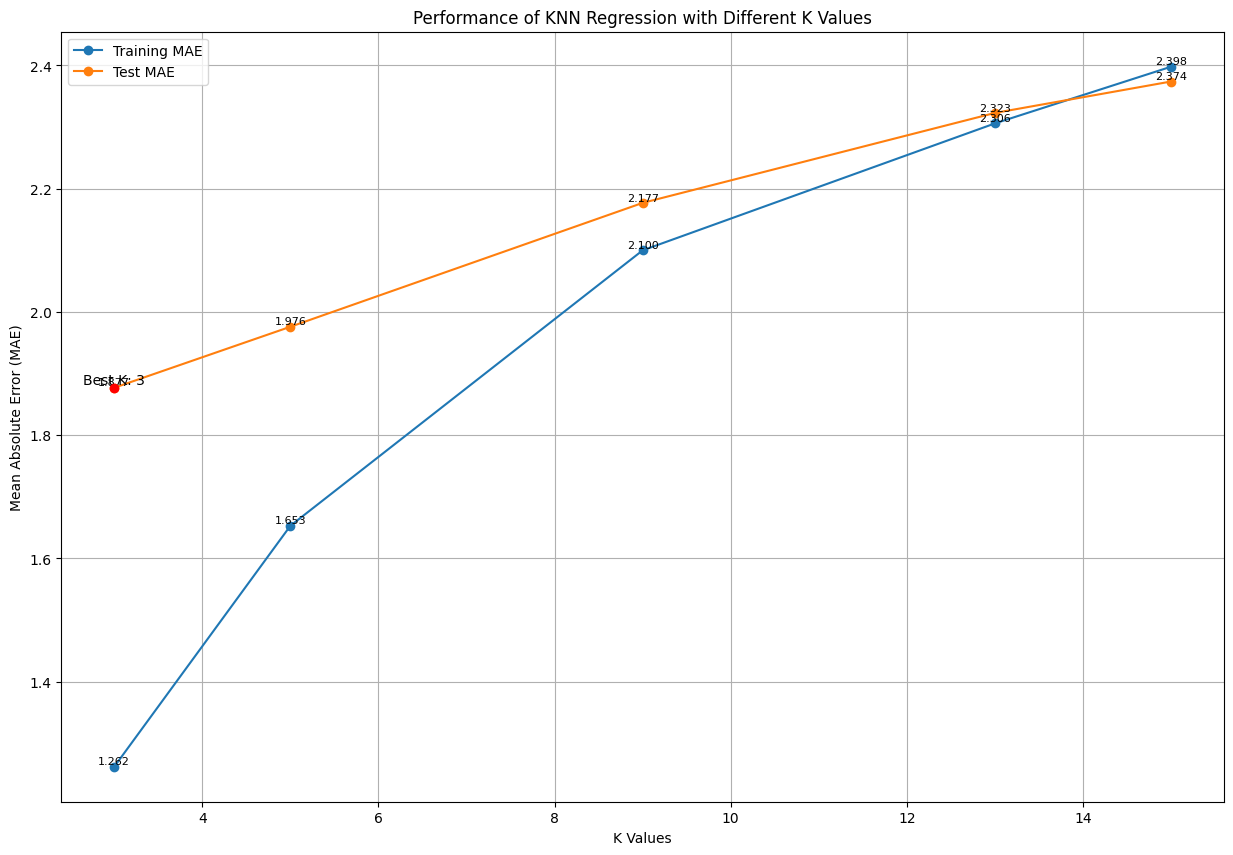

In [29]:
#finding best k value with plot

# K values and corresponding MAE for training and test sets
K_values = [3, 5, 9, 13, 15]
train_MAE = [1.262, 1.653, 2.1, 2.306, 2.398] 
test_MAE = [1.877, 1.976, 2.177, 2.323, 2.374] 

plt.figure(figsize=(15, 10))
plt.plot(K_values, train_MAE, marker='o', label='Training MAE')
plt.plot(K_values, test_MAE, marker='o', label='Test MAE')

for i, k in enumerate(K_values):
    plt.text(k, train_MAE[i], f'{train_MAE[i]:.3f}', ha='center', va='bottom', fontsize=8)
    plt.text(k, test_MAE[i], f'{test_MAE[i]:.3f}', ha='center', va='bottom', fontsize=8)

best_K = K_values[test_MAE.index(min(test_MAE))]

plt.scatter(best_K, min(test_MAE), color='red', zorder=5)
plt.text(best_K, min(test_MAE), f'Best K: {best_K}', ha='center', va='bottom', fontsize=10)

plt.title('Performance of KNN Regression with Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()
